In [1]:
%pylab inline
plt.style.use("bmh")
plt.rcParams["figure.figsize"] = (6,6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
import pathlib

In [4]:
DATA_DIR = pathlib.Path("data/")

In [5]:
!head data/FordA/FordA_TRAIN.txt

  -1.0000000e+00  -7.9717168e-01  -6.6439208e-01  -3.7301463e-01   4.0815121e-02   5.2693599e-01   9.8428794e-01   1.3531202e+00   1.5781078e+00   1.6592509e+00   1.6408093e+00   1.5522896e+00   1.4379516e+00   1.2793537e+00   1.0691193e+00   7.4454700e-01   2.7760541e-01  -3.0072351e-01  -9.3732792e-01  -1.5200828e+00  -1.9516165e+00  -2.1360326e+00  -2.0401363e+00  -1.7229406e+00  -1.2619003e+00  -8.0454833e-01  -4.6153436e-01  -2.7822475e-01  -2.5130000e-01  -3.0183001e-01  -3.1326381e-01  -2.0445830e-01   6.7002208e-02   4.7161115e-01   9.3265143e-01   1.3531202e+00   1.6444976e+00   1.7588356e+00   1.6961341e+00   1.4822114e+00   1.1797690e+00   8.2569008e-01   4.4948122e-01   7.2534692e-02  -2.9703519e-01  -6.4595047e-01  -9.7421115e-01  -1.2508353e+00  -1.4094332e+00  -1.4278748e+00  -1.3024718e+00  -1.0627309e+00  -7.4922349e-01  -4.1727450e-01  -1.0745543e-01   1.6879990e-01   3.9784471e-01   5.7488417e-01   6.8553384e-01   7.1872874e-01   6.7815720e-01   5.4906592e-01   3.325

# Loading the data

In [6]:
DATASET = "FordA"

In [7]:
train = pd.read_csv(DATA_DIR.joinpath(DATASET, f"{DATASET}_TRAIN.txt"), header=None, sep="\s+", skipinitialspace=True)
test = pd.read_csv(DATA_DIR.joinpath(DATASET, f"{DATASET}_TEST.txt"), header=None, sep="\s+", skipinitialspace=True)

In [8]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,-1.0,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,...,1.120756,0.722417,0.362068,0.092083,-0.081268,-0.212573,-0.391456,-0.664392,-1.073796,-1.564343
1,1.0,0.804855,0.634629,0.373474,0.038343,-0.340988,-0.740860,-1.109667,-1.395357,-1.570192,...,0.386403,0.049213,-0.258138,-0.510583,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086
2,-1.0,0.727985,0.111284,-0.499124,-1.068629,-1.578351,-1.990534,-2.302031,-2.503403,-2.585211,...,0.394463,0.463685,0.507735,0.517174,0.504588,0.476270,0.438513,0.394463,0.339400,0.255391
3,-1.0,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,...,-0.952804,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736
4,-1.0,-0.171328,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,1.703751,...,0.776188,0.725496,0.697453,0.731967,0.808545,0.839823,0.733046,0.437520,-0.026585,-0.602213


In [9]:
train.notnull().sum(axis=1).sort_values()

0       501
2393    501
2394    501
2395    501
2396    501
       ... 
1204    501
1205    501
1206    501
1236    501
3600    501
Length: 3601, dtype: int64

In [10]:
test.notnull().sum(axis=1).sort_values()

0       501
883     501
882     501
881     501
880     501
       ... 
437     501
436     501
435     501
433     501
1319    501
Length: 1320, dtype: int64

In [11]:
NUM_SAMPLES = 20
samples = train.sample(NUM_SAMPLES, replace=False)

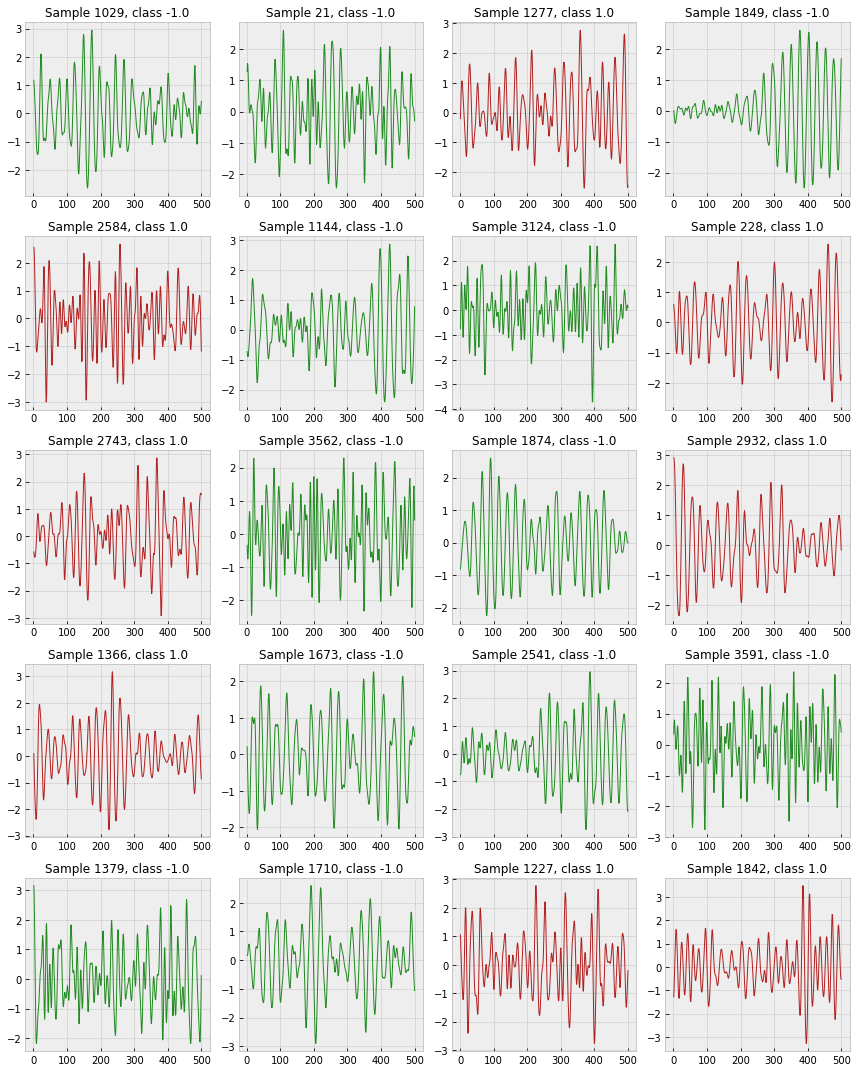

In [12]:
plt.figure(figsize=(12, 15))

for si, (sidx, sample) in enumerate(samples.iterrows()):
    sample_class = sample.iloc[0]
    sample_series = sample.iloc[1:]

    ax = plt.subplot(5, 4, si + 1)
    sample_series.plot(linewidth=1, c="firebrick" if sample_class==1 else "forestgreen", ax=ax)
    plt.title(f"Sample {sidx}, class {sample_class}", fontsize=12)

plt.tight_layout()
plt.show()

In [13]:
train.iloc[:, 0].value_counts()

-1.0    1846
 1.0    1755
Name: 0, dtype: int64

In [14]:
test.iloc[:, 0].value_counts()

-1.0    681
 1.0    639
Name: 0, dtype: int64

# Spectral composition

In [15]:
from scipy.signal import welch

In [16]:
f, w = welch(samples.iloc[:, 1:].values, nperseg=256, fs=1)

Text(0.5, 1.0, 'Power spectra for different classes')

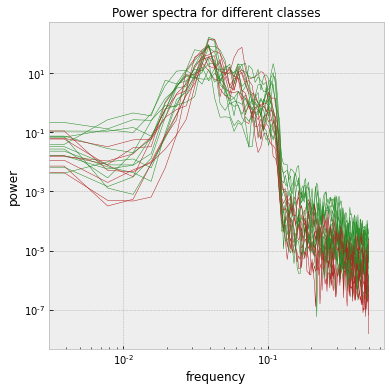

In [17]:
colors = ["firebrick" if c==1 else "forestgreen" for c in samples.iloc[:, 0]]

for i in range(NUM_SAMPLES):
    plt.plot(f, w[i], c=colors[i], linewidth=0.5)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("frequency")
plt.ylabel("power")
plt.title("Power spectra for different classes", fontsize=12)

# Convolutions

In [18]:
# PyTorch imports
import torch
import torch.nn.functional as F
from torch import nn
from torch.utils.data import DataLoader, Dataset

# PyTorch Lightning imports
import pytorch_lightning as pl

Convolutional layers have multiple important parameters, which influence the length of the output:
    
$$
L_{out} = \left\lfloor\frac{L_{in} + 2 \times \text{padding} - \text{dilation}
                    \times (\text{kernel_size} - 1) - 1}{\text{stride}} + 1\right\rfloor
$$

In [25]:
KERNEL_SIZE = 3

conv = nn.Conv1d(1, 8, KERNEL_SIZE)

In this case, output is

$$
L_{out} = \left\lfloor\frac{L_{in} - 1
                    \times (3 - 1) - 1}{1} + 1\right\rfloor = L_{in} - 2
$$

In [26]:
conv_sample = samples.iloc[0, 1:].values.reshape(1, 1, -1)

In [27]:
out = conv(torch.Tensor(conv_sample))

In [28]:
out.shape, conv_sample.shape

(torch.Size([1, 8, 498]), (1, 1, 500))

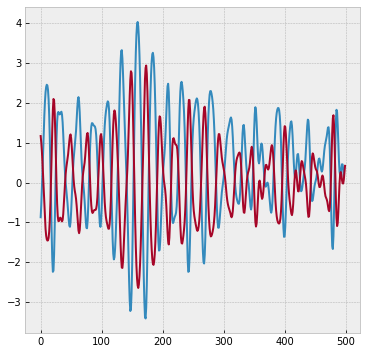

In [29]:
plt.plot(out.detach().numpy()[0, 0])
plt.plot(conv_sample[0][0])

For convolution with the padding of `1`:

$$
L_{out} = \left\lfloor\frac{L_{in} + 2 \times 1 - 1
                    \times (3 - 1) - 1}{1} + 1\right\rfloor = L_{in}
$$

In [30]:
conv_pad = nn.Conv1d(1, 8, KERNEL_SIZE, padding=1)

In [31]:
out_pad = conv_pad(torch.Tensor(conv_sample))

In [32]:
out_pad.shape, conv_sample.shape

(torch.Size([1, 8, 500]), (1, 1, 500))

# Inception block

## Convolutions

In [33]:
LONG_KS = 20
SHORT_KS = 10
NUM_KERNELS = 8
PADDING = "replicate"

conv_long = nn.Conv1d(1, NUM_KERNELS, LONG_KS, padding=(LONG_KS - 1) // 2, padding_mode=PADDING)
conv_short = nn.Conv1d(1, NUM_KERNELS, SHORT_KS, padding=(SHORT_KS - 1) // 2, padding_mode=PADDING)

In [34]:
out_long = conv_long(torch.Tensor(conv_sample))
out_short = conv_short(torch.Tensor(conv_sample))

In [35]:
out_long.size(), out_short.size()

(torch.Size([1, 8, 499]), torch.Size([1, 8, 499]))

In [36]:
torch.cat([out_long, out_short], dim=1).size()

torch.Size([1, 16, 499])

## Pooling

In [37]:
max_pool = nn.MaxPool1d(40, stride=1, padding=4)
out_maxpool = max_pool(torch.Tensor(conv_sample))
out_maxpool.size()

torch.Size([1, 1, 469])

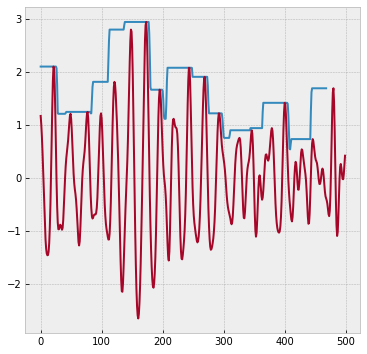

In [38]:
plt.plot(out_maxpool.detach().numpy()[0, 0])
plt.plot(conv_sample[0][0])

## InceptionBlock implementation

In [39]:
class InceptionBlock(pl.LightningModule):
    def __init__(self, in_channels, bottleneck_size, base_ks, num_kernels, activation=False):
        super().__init__()

        self.in_channels = in_channels
        self.bottleneck_size = bottleneck_size
        self.base_ks = base_ks
        self.num_kernels = num_kernels
        self.activation = activation
        
        self.bottleneck = (nn.Conv1d(self.in_channels, self.bottleneck_size, 1)
                           if self.in_channels!=1
                           else nn.Identity())

        self.shortest_conv = nn.Conv1d(in_channels=self.bottleneck_size,
                                       out_channels=self.num_kernels,
                                       kernel_size=self.base_ks,
                                       padding=(self.base_ks - 1) // 2)
        self.short_conv = nn.Conv1d(in_channels=self.bottleneck_size,
                                    out_channels=self.num_kernels,
                                    kernel_size=self.base_ks * 2,
                                    padding=(self.base_ks * 2 - 1) // 2)
        self.long_conv = nn.Conv1d(in_channels=self.bottleneck_size,
                                   out_channels=self.num_kernels,
                                   kernel_size=self.base_ks * 4,
                                   padding=(self.base_ks * 4 - 1) // 2)

        self.max_pool = nn.MaxPool1d(kernel_size=self.base_ks,
                                     stride=1,
                                     padding=(self.base_ks - 1) // 2)

        self.out_channels = self.num_kernels * 3 + self.in_channels
        self.activation_module = nn.ReLU() if self.activation else nn.Identity()
    
    def forward(self, x):
        x_b = self.bottleneck(x)
        
        x_shortest = self.shortest_conv(x_b)
        x_short = self.short_conv(x_b)
        x_long = self.long_conv(x_b)
        x_pool = self.max_pool(x)

        if self.activation:
            x_shortest = self.activation_module(x_shortest)
            x_short = self.activation_module(x_short)
            x_long = self.activation_module(x_long)

        return torch.cat([x_shortest, x_short, x_long, x_pool], dim=1)


In [40]:
inception_block = InceptionBlock(1, 1, 10, 8, activation=True)

In [41]:
inception_block.bottleneck

Identity()

In [42]:
out_inception = inception_block(torch.Tensor(conv_sample))

In [43]:
inception_block.out_channels

25

In [44]:
out_inception.size()

torch.Size([1, 25, 499])

# DalaModule

In [45]:
class CarDataset(Dataset):
    """Dataset which samples the data from hourly electricity data."""

    def __init__(self, df):
        self.df = df

    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, idx):
        sample = self.df.iloc[idx]
        class_label = int(sample.iloc[0]==1)
        values = sample.iloc[1:].values

        return (torch.Tensor(values.reshape(1, -1)),
                torch.Tensor([class_label]))

In [46]:
ds = CarDataset(train)

In [47]:
ds[0]

(tensor([[-7.9717e-01, -6.6439e-01, -3.7301e-01,  4.0815e-02,  5.2694e-01,
           9.8429e-01,  1.3531e+00,  1.5781e+00,  1.6593e+00,  1.6408e+00,
           1.5523e+00,  1.4380e+00,  1.2794e+00,  1.0691e+00,  7.4455e-01,
           2.7761e-01, -3.0072e-01, -9.3733e-01, -1.5201e+00, -1.9516e+00,
          -2.1360e+00, -2.0401e+00, -1.7229e+00, -1.2619e+00, -8.0455e-01,
          -4.6153e-01, -2.7822e-01, -2.5130e-01, -3.0183e-01, -3.1326e-01,
          -2.0446e-01,  6.7002e-02,  4.7161e-01,  9.3265e-01,  1.3531e+00,
           1.6445e+00,  1.7588e+00,  1.6961e+00,  1.4822e+00,  1.1798e+00,
           8.2569e-01,  4.4948e-01,  7.2535e-02, -2.9704e-01, -6.4595e-01,
          -9.7421e-01, -1.2508e+00, -1.4094e+00, -1.4279e+00, -1.3025e+00,
          -1.0627e+00, -7.4922e-01, -4.1727e-01, -1.0746e-01,  1.6880e-01,
           3.9784e-01,  5.7488e-01,  6.8553e-01,  7.1873e-01,  6.7816e-01,
           5.4907e-01,  3.3256e-01,  6.3314e-02, -2.1515e-01, -4.6891e-01,
          -6.5702e-01, -7

In [48]:
class CarDataModule(pl.LightningDataModule):
    """DataModule for electricity data."""

    def __init__(self, train_df, val_df, test_df,
                 batch_size=32, workers=1):

        super().__init__()
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        self.batch_size = batch_size
        self.workers = workers

    def setup(self, stage=None):
        if stage == "fit" or stage is None:
            self.train_ds = CarDataset(self.train_df)
            self.val_ds = CarDataset(self.val_df)

        if stage == "test" or stage is None:
            self.test_ds = CarDataset(self.test_df)

    def train_dataloader(self):
        return DataLoader(self.train_ds, batch_size=self.batch_size, num_workers=self.workers)

    def val_dataloader(self):
        return DataLoader(self.val_ds, batch_size=self.batch_size, num_workers=self.workers)

    def test_dataloader(self):
        return DataLoader(self.test_ds, batch_size=self.batch_size, num_workers=self.workers)

In [49]:
train.shape

(3601, 501)

In [50]:
TRAIN_SIZE = 2500

train_df = train.sample(TRAIN_SIZE, replace=False)
val_df = train.loc[train.index.difference(train_df.index)]

In [51]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
3446,1.0,-1.268086,-1.335498,-1.365338,-1.372401,-1.336863,-1.233662,-1.005994,-0.628213,-0.105473,...,0.491264,0.547256,0.547954,0.492464,0.392730,0.267191,0.127886,-0.008607,-0.134138,-0.255081
32,-1.0,0.919064,0.968997,0.894098,0.715172,0.479657,0.277430,0.108491,-0.015925,-0.129521,...,-0.911800,-0.703747,-0.459909,-0.246863,-0.111546,-0.074179,-0.065108,-0.005522,0.173403,0.487147
2995,-1.0,0.682053,0.593105,0.513280,0.438016,0.349068,0.222032,0.036838,-0.216550,-0.522167,...,0.679773,0.823458,0.907845,0.896441,0.768721,0.556614,0.298892,0.050294,-0.136269,-0.255323
2727,1.0,0.199360,-0.207435,-0.637455,-1.050461,-1.393063,-1.603786,-1.638933,-1.496010,-1.197005,...,1.715444,1.533546,1.237437,0.837338,0.368428,-0.134372,-0.624327,-1.047272,-1.354009,-1.508710
55,-1.0,0.232898,0.166495,0.111866,0.058178,-0.015619,-0.143386,-0.305391,-0.457035,-0.538980,...,1.194096,1.024556,0.953914,0.892691,0.727861,0.385484,-0.129729,-0.774452,-1.433774,-1.980069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,-1.0,2.077447,1.983911,1.412299,0.504997,-0.498961,-1.331434,-1.830295,-1.892653,-1.643222,...,1.308370,0.730523,0.142283,-0.334752,-0.590418,-0.678758,-0.681876,-0.662130,-0.652776,-0.644462
2397,1.0,0.306697,0.391593,0.453201,0.439782,0.313399,0.096787,-0.172243,-0.445237,-0.676020,...,0.628228,0.573567,0.516285,0.470381,0.432583,0.388758,0.322943,0.227355,0.106107,-0.035773
1440,-1.0,-1.551930,-1.924762,-2.221545,-2.388485,-2.407034,-2.277191,-1.980409,-1.559349,-1.071513,...,-1.742983,-1.288535,-0.759892,-0.186731,0.408688,0.994833,1.551300,2.044701,2.452777,2.731010
1573,-1.0,-0.212669,-0.297932,-0.228397,-0.004197,0.324571,0.687145,1.000052,1.165611,1.157333,...,0.663139,0.452879,0.120933,-0.189490,-0.333527,-0.220947,0.141628,0.610988,1.016608,1.198722


In [52]:
val_df

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
2,-1.0,0.727985,0.111284,-0.499124,-1.068629,-1.578351,-1.990534,-2.302031,-2.503403,-2.585211,...,0.394463,0.463685,0.507735,0.517174,0.504588,0.476270,0.438513,0.394463,0.339400,0.255391
3,-1.0,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,...,-0.952804,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736
7,1.0,1.045890,0.611195,0.153108,-0.279675,-0.651621,-0.922651,-1.083900,-1.131134,-1.084075,...,0.797700,1.328339,1.663845,1.802068,1.765138,1.592741,1.329302,1.013114,0.674495,0.337014
9,1.0,-0.284181,-0.192609,-0.032292,0.172823,0.394703,0.588146,0.704184,0.712422,0.593282,...,-0.194671,-0.153455,-0.113654,-0.054267,0.031780,0.145255,0.276291,0.392835,0.462117,0.450756
14,1.0,1.429452,1.079359,0.510714,-0.146231,-0.738000,-1.176298,-1.362886,-1.273359,-0.967208,...,-0.472841,-0.721417,-0.762745,-0.615829,-0.325957,0.038887,0.396569,0.691670,0.894961,0.968502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3587,-1.0,1.038593,0.707371,0.244259,-0.252574,-0.652739,-0.864811,-0.872304,-0.687210,-0.399451,...,-1.246990,-1.501776,-1.554232,-1.404358,-1.089622,-0.729924,-0.385213,-0.123682,0.019523,0.101429
3592,-1.0,-0.817429,-0.810198,-0.755966,-0.651117,-0.506498,-0.327894,-0.129043,0.073785,0.265406,...,-0.502883,-0.578808,-0.604116,-0.571577,-0.488421,-0.358264,-0.195206,-0.017071,0.160918,0.325422
3594,1.0,-0.525638,-0.569733,-0.547823,-0.493929,-0.432702,-0.374140,-0.319496,-0.269665,-0.221184,...,-0.897707,-0.985553,-1.008419,-0.979761,-0.902046,-0.767631,-0.589465,-0.385855,-0.171491,0.013573
3597,1.0,0.041994,0.422255,0.740529,0.975426,1.109891,1.137270,1.058349,0.894955,0.671224,...,-0.463329,-0.392667,-0.333749,-0.316543,-0.340299,-0.392876,-0.450805,-0.482609,-0.467769,-0.393755


In [53]:
dm = CarDataModule(train_df, val_df, test)
dm.setup("fit")

In [54]:
dl = dm.train_dataloader()

In [55]:
batch = next(iter(dl))

In [56]:
batch[0].shape, batch[1].shape

(torch.Size([32, 1, 500]), torch.Size([32, 1]))

In [57]:
inception_block(batch[0])

tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0122,  0.0616,  0.0830],
         [ 0.0947,  0.0000,  0.0642,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0682,  0.0985,  0.1624],
         ...,
         [ 0.4764,  0.5015,  0.4552,  ...,  0.3296,  0.2732,  0.1942],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [-1.2337, -1.0060, -0.6282,  ...,  0.5480,  0.4925,  0.3927]],

        [[ 0.6773,  0.5742,  0.3400,  ...,  0.2539,  0.1655,  0.1565],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.5872,  0.5944,  0.3861,  ...,  0.4056,  0.3102,  0.1708],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0167,  0.0924],
         [ 0.3144,  0.1318,  0.0239,  ...,  0.0072,  0.0447,  0.1869],
         [ 0.9690,  0.9690,  0.9690,  ...,  0.4871,  0.4871,  0.4871]],

        [[ 0.4863,  0.4042,  0.2409,  ...,  0.0077,  0.0488,  0.0760],
         [ 0.0000,  0.0000,  0.0000,  ...,  0

# Model

In [58]:
class InceptionModel(pl.LightningModule):
    """InceptionTime model for time series classification."""
   
    def __init__(self,
                 in_channels=1,
                 bottleneck_size=[1, 8],
                 base_ks=[10, 10],
                 num_kernels=[8, 8],
                 activation=True,
                 global_pooling="max",
                 intermediate_pooling=4,
                 lr=1e-3,
                 thr=0.5):
        super().__init__()

        self.in_channels = in_channels
        self.bottleneck_size = bottleneck_size
        self.base_ks = base_ks
        self.num_kernels = num_kernels
        self.activation = activation
        self.global_pooling = global_pooling
        self.intermediate_pooling = intermediate_pooling
        self.lr = lr
        self.thr = thr

        self.inception_1 = InceptionBlock(self.in_channels,
                                          self.bottleneck_size[0],
                                          self.base_ks[0],
                                          self.num_kernels[0],
                                          self.activation)
        
        self.inception_2 = InceptionBlock(self.inception_1.out_channels,
                                          self.bottleneck_size[1],
                                          self.base_ks[1],
                                          self.num_kernels[1],
                                          self.activation)
        self.linear = nn.Linear(self.inception_2.out_channels, 1)
        self.intermediate_pooling = nn.MaxPool1d(self.intermediate_pooling)

    def forward(self, x):

        x_1 = self.inception_1(x)
        x_1 = self.intermediate_pooling(x_1)
        x_2 = self.inception_2(x_1)
        x_2 = x_2.mean(-1) # global average pooling

        x_out = self.linear(x_2)
        x_out = torch.sigmoid(x_out)

        return x_out

    def training_step(self, batch, batch_idx):
        x, y = batch
        predictions = self(x)
        return F.binary_cross_entropy(predictions, y)

    def validation_step(self, batch, batch_idx):
        x, y = batch
        predictions = self(x)
        loss = F.binary_cross_entropy(predictions, y)
        self.log('val_logloss', loss.item(), prog_bar=True)
       
        return loss

    def test_step(self, batch, batch_idx):
        x, y = batch
        predictions = self(x)
        accuracy = ((predictions > self.thr) == y).float().mean()
        loss = F.binary_cross_entropy(predictions, y)
        self.log('test_acc', accuracy.item(), prog_bar=True)
        self.log('test_loss', loss.item(), prog_bar=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        return optimizer

In [59]:
model = InceptionModel()

In [60]:
model(torch.Tensor(conv_sample))

tensor([[0.4057]], grad_fn=<SigmoidBackward>)

# Training

In [62]:
ds = CarDataModule(train_df, val_df, test, batch_size=32)
model = InceptionModel(num_kernels=[16, 32])
trainer = pl.Trainer(max_epochs=20, progress_bar_refresh_rate=1)
trainer.fit(model, ds)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name                 | Type           | Params
--------------------------------------------------------
0 | inception_1          | InceptionBlock | 1.2 K 
1 | inception_2          | InceptionBlock | 18.4 K
2 | linear               | Linear         | 146   
3 | intermediate_pooling | MaxPool1d      | 0     
--------------------------------------------------------
19.7 K    Trainable params
0         Non-trainable params
19.7 K    Total params
0.079     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

/home/traveller/.local/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)
/home/traveller/.local/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [63]:
trainer.test()

/home/traveller/.local/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_acc': 0.9477272629737854, 'test_loss': 0.1513875275850296}
--------------------------------------------------------------------------------


[{'test_acc': 0.9477272629737854, 'test_loss': 0.1513875275850296}]